In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
age_gender = pd.read_csv("age_gender_info.csv")

In [ ]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [ ]:
age_gender.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [ ]:
# 결측치 확인
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [ ]:
# 결측치 확인
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

NaN 값 
- 임대보증금
- 임대료
- 도보 10분거리 내 지하철역 수 
- 도보 10분거리 내 버스정류장 수

In [ ]:
# 결측치 확인
age_gender.isnull().sum()

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

In [ ]:
# 특성명 변경
train.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

test.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수'
]

In [ ]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


# Train / Test

In [ ]:
# Train / Test 비교
train['단지코드'].unique() == test['단지코드'].unique()

False

> train test가 랜덤으로 나뉘어져 있는것 아닌가 생각이 든다.

In [ ]:
# train / test concat
train['is_train'] = 1
test['is_train'] = 0
features = test.columns.to_list()
dt = train[features]
print(dt.shape, test.shape)
dt = pd.concat([dt, test], axis = 0)
print(dt.shape)

(2952, 15) (1022, 15)
(3974, 15)


# Target

In [ ]:
# Target_feature
target = '등록차량수'

['등록차량수']

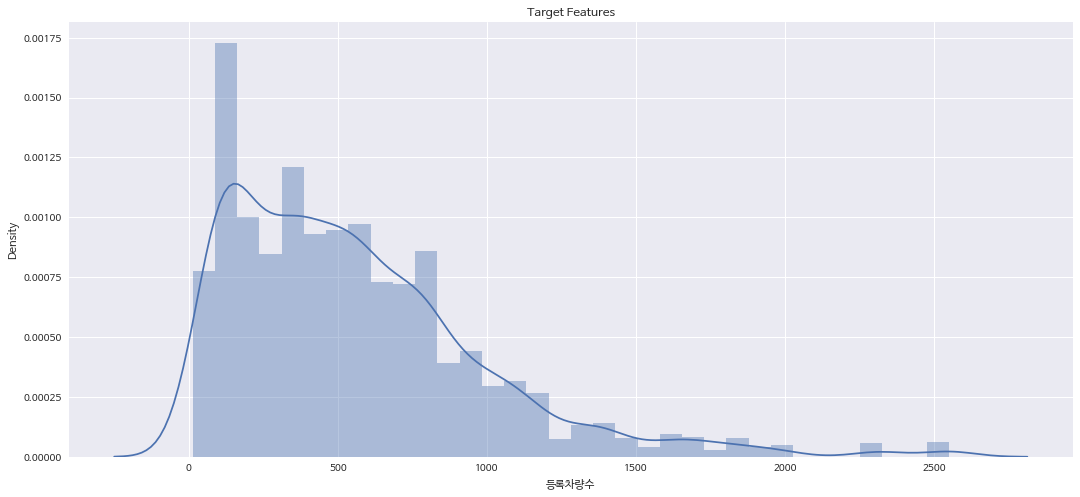

In [ ]:
# 타켓 특성 분포
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(train[target], ax = ax)
ax.set_title('Target Features')
plt.show()

- Right skewed distribution 

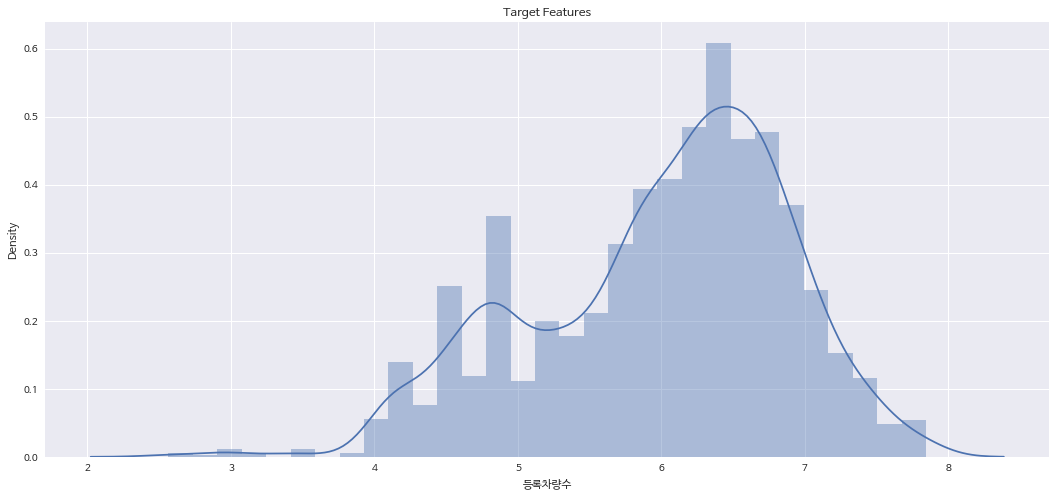

In [ ]:
# 정규화 해보기
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.distplot(np.log(train['등록차량수']), ax = ax)
ax.set_title('Target Features')
plt.show()

In [ ]:
# 정규성 확인
print('Target has a skew of ' + str(train['등록차량수'].skew().round(decimals=2)) + 
      ' while the log-transformed Target improves the skew to ' + 
      str(np.log(train['등록차량수']).skew().round(decimals=2)))

Target has a skew of 1.46 while the log-transformed Target improves the skew to -0.57


In [ ]:
# null hypothesis: x는 정규분포에서 추출 되었다.
from scipy import stats
k2, p = stats.normaltest(np.log(train['등록차량수']))
if p < 0.05:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


In [ ]:
# Train/Test 그룹화
unique_cols = ['총세대수', '지역', '공가수', 
               '지하철',
               '버스',
               '단지내주차면수']

train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates().reset_index()
test_agg = test.set_index('단지코드')[unique_cols].drop_duplicates().reset_index()

In [ ]:
train_agg.head()

,단지코드,총세대수,지역,공가수,지하철,버스,단지내주차면수
0,C2483,900,경상북도,38.0,0.0,3.0,1425.0
1,C2515,545,경상남도,17.0,0.0,3.0,624.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1285.0
3,C1945,755,경기도,6.0,1.0,3.0,734.0
4,C1470,696,전라북도,14.0,0.0,2.0,645.0


In [ ]:
test_agg.head()

,단지코드,총세대수,지역,공가수,지하철,버스,단지내주차면수
0,C1072,754,경기도,14.0,0.0,2.0,683.0
1,C1128,1354,경기도,9.0,0.0,3.0,1216.0
2,C1456,619,부산광역시,18.0,0.0,16.0,547.0
3,C1840,593,전라북도,7.0,0.0,3.0,543.0
4,C1332,1297,경기도,11.0,0.0,2.0,1112.0


제출 파일은 단지코드별 등록차량수를 예측하여 제출해야 한다.하지만 훈련/테스트 데이터셋은 단지코드별 여러 행이 존재했고, 하나의 단지코드를 한 행으로 표현할 수 있는 방법을 찾아야했다. 위의 특성이 아닌 특성들에 대해서 깊게 볼 필요가 있다.

# 단지코드
sample_submission 파일에는 단지코드 별로 등록차량수를 예측하도록 되어있다. 하지만, train/test 데이터셋을 보게되면 하나의 단지코드에 여러행이 존재한다. 어떤 차이가 있는지 확인해보자. 

In [ ]:
# 단지코드 Feature
train['단지코드'].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C2560     2
C2520     1
C2340     1
C2437     1
C2188     1
Name: 단지코드, Length: 423, dtype: int64

In [ ]:
df = train.loc[train['단지코드'] == 'C1439', :]


한 단지내에 여러 건물이 존재할 경우 여러행이 존재하였다.

1. C1439라는 단지는 3개의 서로 다른 아파트와, 45개의 서로 다른 상가로 구성되어있다. 


In [ ]:
for i in (dt['단지코드'].unique()):
  print('{0}----------------------'.format(i))
  print(dt.loc[dt['단지코드'] == i, '임대건물구분'].value_counts())

C2483----------------------
아파트    8
Name: 임대건물구분, dtype: int64
C2515----------------------
아파트    7
Name: 임대건물구분, dtype: int64
C1407----------------------
아파트    11
Name: 임대건물구분, dtype: int64
C1945----------------------
아파트    6
Name: 임대건물구분, dtype: int64
C1470----------------------
아파트    4
Name: 임대건물구분, dtype: int64
C1898----------------------
아파트    6
Name: 임대건물구분, dtype: int64
C1244----------------------
아파트    13
Name: 임대건물구분, dtype: int64
C1171----------------------
아파트    12
Name: 임대건물구분, dtype: int64
C2073----------------------
아파트    6
Name: 임대건물구분, dtype: int64
C2513----------------------
아파트    3
Name: 임대건물구분, dtype: int64
C1936----------------------
아파트    4
Name: 임대건물구분, dtype: int64
C2049----------------------
아파트    3
Name: 임대건물구분, dtype: int64
C2202----------------------
아파트    3
Name: 임대건물구분, dtype: int64
C1925----------------------
상가     4
아파트    2
Name: 임대건물구분, dtype: int64
C2576----------------------
아파트    2
Name: 임대건물구분, dtype: int64
C1312----------------------


위의 가설이 참이라면 아래의 가설이 참일 확률이 크다.
2. 단지코드가 여려개인 이유가 단지내의 많은 수의 상가와 아파트가 존재할 경우가 맞다면, 총세대수의 경우 전용면적별세대수와 동일해야한다. 

In [ ]:
# 세대수 확인
print('총세대수: ', train.loc[train['단지코드'] == 'C1439', :]['전용면적별세대수'].sum())

총세대수:  1755


In [ ]:
# 총세대수와 전용면적별 세대수가 다른 경우
code = train['단지코드'].unique()

same = []
dif = []

for i in code:
  if not train.loc[train['단지코드'] == i, :]['총세대수'].mean() == train.loc[train['단지코드'] == i, :]['전용면적별세대수'].sum():
    diff = train.loc[train['단지코드'] == i, :]['총세대수'].mean() - train.loc[train['단지코드'] == i, :]['전용면적별세대수'].sum()
    print(f"{i} : Nope, diff : {diff}")
    dif.append(i)

  else:
    same.append(i)

C1925 : Nope, diff : 1.0
C1312 : Nope, diff : 1.0
C2013 : Nope, diff : 1.0
C1424 : Nope, diff : 1.0
C2520 : Nope, diff : 10.0
C2319 : Nope, diff : 1.0
C1850 : Nope, diff : 3.0
C1068 : Nope, diff : 1.0
C2644 : Nope, diff : 1.0
C1206 : Nope, diff : 267.0
C2156 : Nope, diff : 1.0
C1344 : Nope, diff : 124.0
C1804 : Nope, diff : 452.0
C1490 : Nope, diff : 94.0
C1024 : Nope, diff : 203.0
C1740 : Nope, diff : 316.0
C2620 : Nope, diff : 123.0
C2405 : Nope, diff : 316.0
C2470 : Nope, diff : 230.0
C2453 : Nope, diff : 1.0
C1910 : Nope, diff : 4.0
C2139 : Nope, diff : 5.0
C2508 : Nope, diff : 5.0
C1695 : Nope, diff : 3.0
C2556 : Nope, diff : 3.0
C2362 : Nope, diff : 9.0
C2568 : Nope, diff : 2.0
C2245 : Nope, diff : 2.0
C2549 : Nope, diff : 2.0
C1584 : Nope, diff : 7.0
C2298 : Nope, diff : 3.0
C2225 : Nope, diff : 6.0
C1218 : Nope, diff : 8.0
C1970 : Nope, diff : 14.0
C1732 : Nope, diff : 2.0
C2433 : Nope, diff : 3.0
C1894 : Nope, diff : 11.0
C1156 : Nope, diff : 6.0
C2142 : Nope, diff : 8.0
C2186

In [ ]:
# test
code = test['단지코드'].unique()

test_same = []
test_dif = []


for i in code:
  if not test.loc[test['단지코드'] == i, :]['총세대수'].mean() == test.loc[test['단지코드'] == i, :]['전용면적별세대수'].sum():
    diff = test.loc[test['단지코드'] == i, :]['총세대수'].mean() - test.loc[test['단지코드'] == i, :]['전용면적별세대수'].sum()
    print(f"{i} : Nope, diff : {diff}")
    test_dif.append(i)
  
  else:
    test_same.append(i)

C2411 : Nope, diff : 1.0
C1812 : Nope, diff : 12.0
C2497 : Nope, diff : 122.0
C1030 : Nope, diff : 5.0
C1749 : Nope, diff : 8.0
C1349 : Nope, diff : 5.0
C2043 : Nope, diff : 9.0
C1229 : Nope, diff : 3.0
C2363 : Nope, diff : 8.0
C1414 : Nope, diff : 3.0
C2174 : Nope, diff : 8.0
C2404 : Nope, diff : 14.0
C1683 : Nope, diff : 2.0
C1038 : Nope, diff : 4.0
C2456 : Nope, diff : 3.0
C1266 : Nope, diff : 5.0
C1267 : Nope, diff : 5.0
C2189 : Nope, diff : 4.0


총세대수와 전용면적별세대수의 합이 동일하지 않는곳이 존재한다. 이와 같은 경우를 더욱 자세히 봐보자.

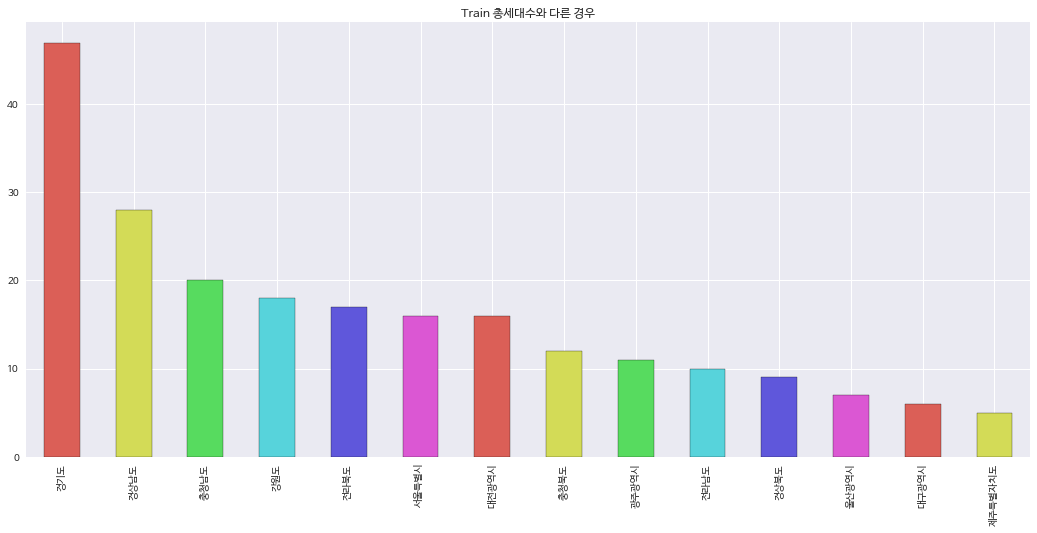

In [ ]:
# 지역간의 차이
colors = sns.color_palette('hls')
plt.subplots(figsize=(18,8))
train.loc[train['단지코드'].isin(dif), '지역'].value_counts().plot.bar(color = colors, edgecolor = 'black')
plt.title('Train 총세대수와 다른 경우')
plt.show()

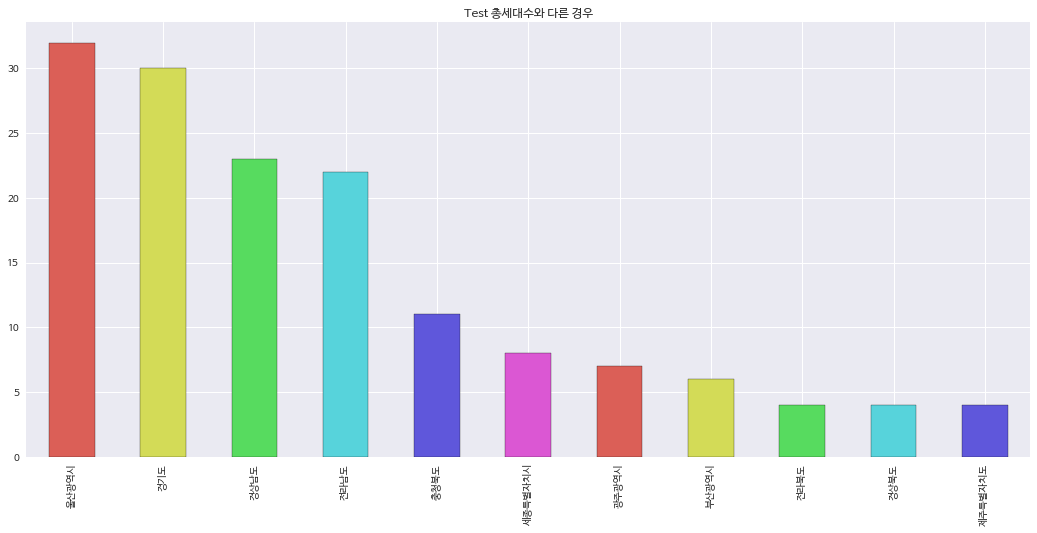

In [ ]:
# 지역간의 차이
colors = sns.color_palette('hls')
plt.subplots(figsize=(18,8))
test.loc[test['단지코드'].isin(test_dif), '지역'].value_counts().plot.bar(color = colors, edgecolor = 'black')
plt.title('Test 총세대수와 다른 경우')
plt.show()

> train/test 모두 경기도와 경상남도에서 많은 총세대수와 전용면적별세대수의 합의 차이를 많이 보여준다. 하지만, 울산광역시의 경우 train과 test에서 엄청난 차이를 보여준다. 

3. 지역에 따라 다르게 보아야 한다.
이를 확인하기 위해서, 총세대수와 전용면적별세대수의 합이 같은 경우와 다른 경우를 비교해보면 다음과 같다.

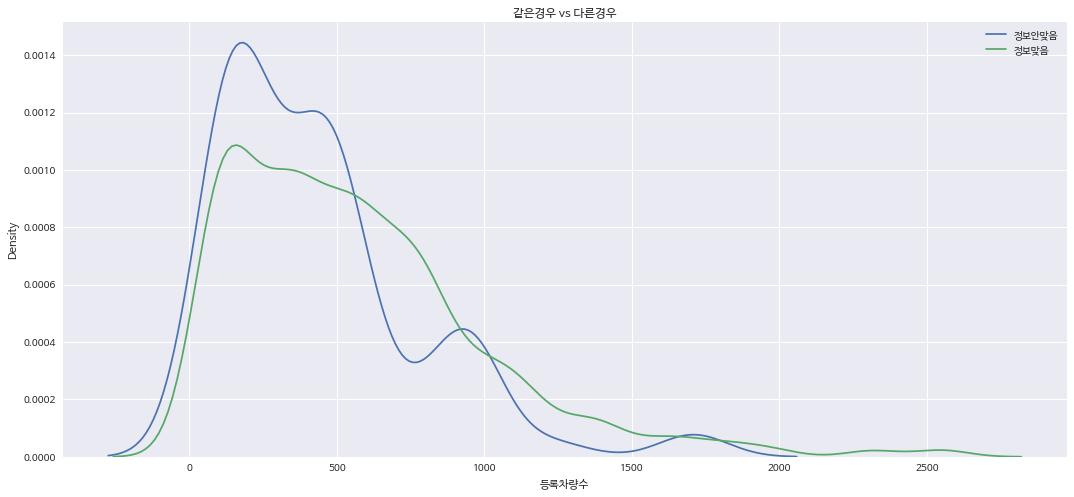

In [ ]:
# 누락정부 여부에 따른 비교
train['누락정보'] = 0

train['누락정보'] = train['단지코드'].map(lambda x: 1 if x in (dif) else 0)

plt.subplots(figsize=(18, 8))
sns.kdeplot(train.loc[train['누락정보'] == 1, '등록차량수'], label='정보안맞음')
sns.kdeplot(train.loc[train['누락정보'] == 0, '등록차량수'], label = '정보맞음')
plt.title('같은경우 vs 다른경우')
plt.legend()
plt.show()

> 정보가 맞느냐 안 맞느냐는 주차수요에 있어서 큰 영향을 주지는 않는듯 하다. 총세대수를 전용면적별세대수의 총합으로 보자.

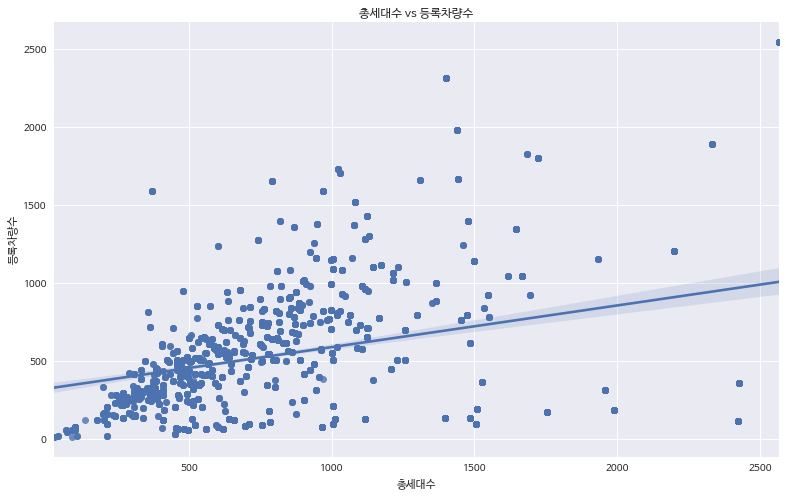

In [ ]:
# 총세대수 vs 등록차량수
plt.subplots(figsize=(13, 8))
sns.regplot('총세대수', '등록차량수', data = train)
plt.title('총세대수 vs 등록차량수')
plt.show()

> 총세대수와 등록차량수는 약간의 선형관계가 존재한다.

# 임대건물구분

In [ ]:
train['is_train'] = 1
test['is_train'] = 0
features = test.columns.to_list()
dt = train[features]
print(dt.shape, test.shape)
dt = pd.concat([dt, test], axis = 0)
print(dt.shape)

(2952, 15) (1022, 15)
(3974, 15)


In [ ]:
dt['임대건물구분'].value_counts()

아파트    3235
상가      739
Name: 임대건물구분, dtype: int64

> 단지내에 아파트만 존재하는 경우는 맍지만 상가만 존재하는 단지는 없다. 따라서 상가의 유무가 어떤 영향을 주는지 확인해보았다.

In [ ]:
# 상가여부에 따른 영향 확인
train['상가여부'] = 0
for code in train['단지코드'].unique():
  if ((train['단지코드'] == code) & (train['임대건물구분']=='상가')).sum():
    train.loc[train['단지코드'] == code, '상가여부'] = 1

  else:
    train.loc[train['단지코드'] == code, '상가여부'] = 0

In [ ]:
# 상가여부에 따른 영향 확인
test['상가여부'] = 0
for code in test['단지코드'].unique():
  if ((test['단지코드'] == code) & (test['임대건물구분']=='상가')).sum():
    test.loc[test['단지코드'] == code, '상가여부'] = 1

  else:
    test.loc[test['단지코드'] == code, '상가여부'] = 0

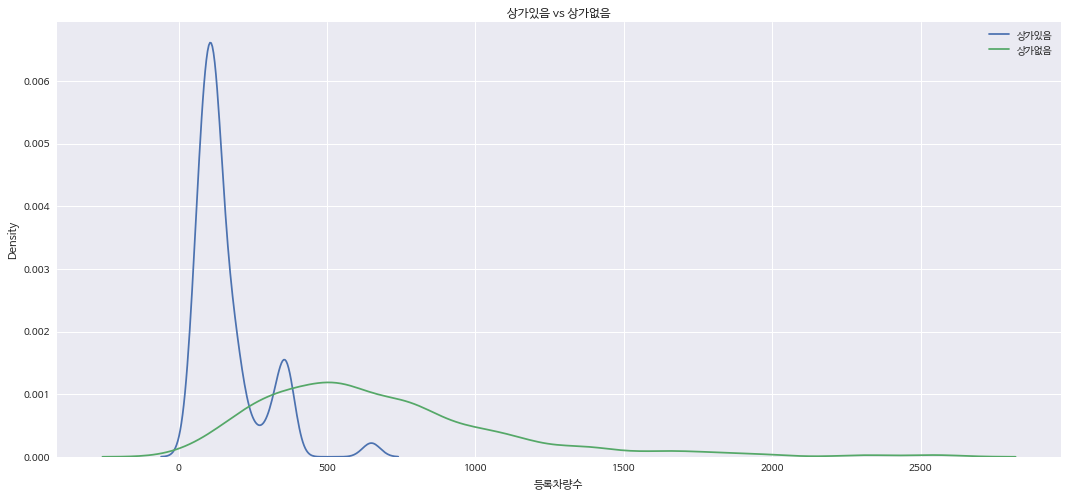

In [ ]:
# 상가여부에 따른 영향 확인
plt.subplots(figsize=(18, 8))
sns.kdeplot(train.loc[train['상가여부'] == 1, '등록차량수'], label='상가있음')
sns.kdeplot(train.loc[train['상가여부'] == 0, '등록차량수'], label='상가없음')
plt.title('상가있음 vs 상가없음')
plt.legend()
plt.show()

> 상가의 존재여부는 등록차량 수를 예측하는데 의믜있는 특성일 수 있다.

In [ ]:
# Add 상가여부 feature
train_agg = pd.merge(train_agg, train.groupby('단지코드')['상가여부'].mean().reset_index(), on='단지코드')
test_agg = pd.merge(test_agg, test.groupby('단지코드')['상가여부'].mean().reset_index(), on='단지코드')

# 공급유형


Text(0.5, 1.0, '공급유형')

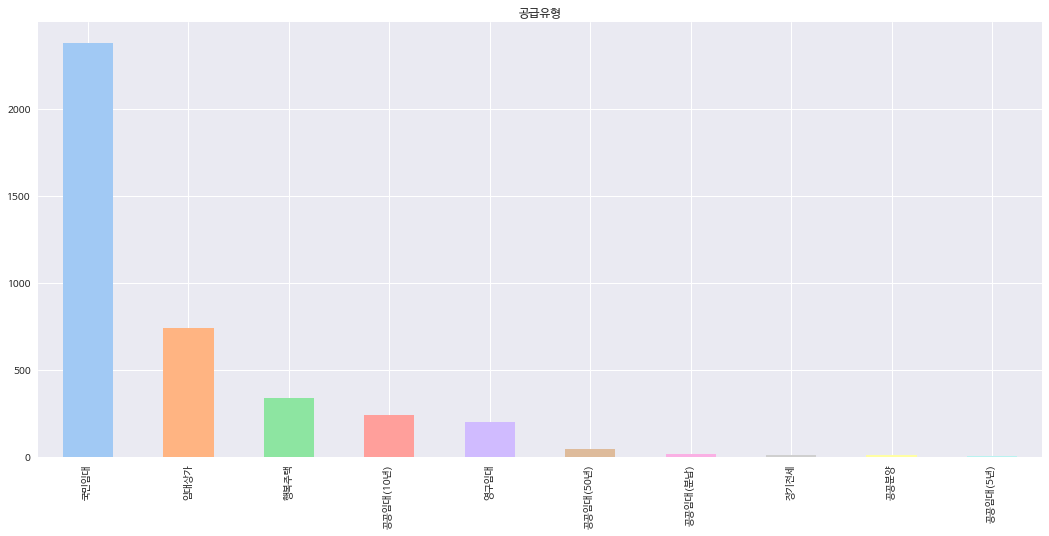

In [ ]:
# 공급유형의 분포
plt.subplots(figsize = (18, 8))
dt['공급유형'].value_counts().plot.bar(color = sns.color_palette('pastel'))
plt.title('공급유형')

4. 공급유형의 경우 상가는 모두 임대 상가인가?

In [ ]:
# 단지구분
df.loc[train['임대건물구분'] == '상가', '공급유형'].value_counts()

임대상가    45
Name: 공급유형, dtype: int64

> 상가는 모두 공급유형이 임대상가이다.

### 아파트 공급유형
- 영구임대: 생계급여 또는 의료급여 수급자 등[소득 1분위]
  - (일반)생계급여 또는 의료급여 수급자
  - (일반)국가유공자
  - (특별/우선)수급자 선정기준의 소득인정액 이하인 국가유공자
  - (특별/우선)귀환국군포로
  - (특별/우선)수급자 신혼부부
- 국민임대: 무주택세대구성원[소득 2~4분위] - 3
  - (일반)해당지역 거주 무주택세대구성원
  - (특별/우선)3자녀 이상 가구
  - (특별/우선)국가유공자
  - (특별/우선)영구임대 입주자
  - (특별/우선)비닐간이공작물 거주자
  - (특별/우선)신혼부부(혼인기간 5년이내)
  - (특별/우선)사업지구 철거민
  - (특별/우선)기타 공급대상(고령자, 노부모부양자, 장애인, 파독근로자 등)
- 장기전세: 무주택세대구성원[소득 3~4분위] - 2
  - 국민임대와 같음
- 공공임대(5년/10년/분납): 무주택세대구성원[소득 3~5분위] - 3
  - (일반)해당지역 거주무주택세대구성원
  - (특별/우선)다자녀 특별
  - (특별/우선)신혼부부 특별
  - (특별/우선)생애최초 특별
  - (특별/우선)노부모부양 특별
  - (특별/우선)국가유공자 특별
  - (특별/우선)기타 특별(장애인, 철거민 등)
- 행복주택: 무주택세대구성원/무주택자[소득 2~5분위] - 4
  - 대학생(취준생 포함), 사회초년생(제취준생 포함), 신혼부부(예비신혼부부, 대학생, 취준생 신혼부부 포함), 고령자, 주거급여수급자, 산업단지 근로자


5. 공급 유형과 신분은 같은 패턴을 보여준다. 같은 정보를 담고 있는것인가?

In [ ]:
pd.concat([train.신분.value_counts(), 
           test.신분.value_counts(), dt.신분.value_counts()], axis=1)

,신분,신분,신분
A,1801,572.0,2373
D,569,180.0,749
H,155,92.0,247
J,114,84.0,198
C,95,34.0,129
I,49,7.0,56
E,37,10.0,47
K,33,16.0,49
L,33,12.0,45
N,30,10.0,40


In [ ]:
pd.crosstab(dt.공급유형, dt.신분).style.background_gradient('summer_r')

신분,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
공급유형,,,,,,,,,,,,,,,
공공분양,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
공공임대(10년),240,0,0,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(50년),44,0,0,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(5년),3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(분납),18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
국민임대,2057,21,0,0,44,0,10,247,0,0,0,0,0,0,0
영구임대,2,0,129,3,3,3,0,0,56,0,0,0,0,0,0
임대상가,0,0,0,739,0,0,0,0,0,0,0,0,0,0,0
장기전세,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- 장기전세 + 공공임대 
- 국민임대 
- 공공분양 + 임대상가 
- 행복주택
- 영구임대 

총 5개의 그룹으로 나눌 수 있다. 신분이 어느정도 공급유형과 유사한 정보를 담고 있다고 볼 수 있다. 따라서 NaN값을 2개의 특성을 비교하여 의미있는 값으로 채울 수 있다. 

In [ ]:
# 공급유형 추가
for idx, row in train_agg.iterrows():
  train_agg.loc[idx, '공급유형'] = train.loc[((train['단지코드'] == row['단지코드']) & (train.임대건물구분 == '아파트')), '공급유형'].values[0]

for idx, row in test_agg.iterrows():
  test_agg.loc[idx, '공급유형'] = test.loc[((test['단지코드'] == row['단지코드']) & (test.임대건물구분 == '아파트')), '공급유형'].values[0]

In [ ]:
train_agg.공급유형.value_counts()

국민임대         312
공공임대(10년)     36
영구임대          31
행복주택          29
공공임대(50년)     11
장기전세           2
공공임대(5년)       1
공공분양           1
Name: 공급유형, dtype: int64

In [ ]:
test_agg.공급유형.value_counts()

국민임대         114
행복주택          15
영구임대           9
공공임대(10년)      9
공공임대(50년)      3
Name: 공급유형, dtype: int64

> 상가여부를 통해서 이미 상가의 정보는 담고 있기 때문에 아파트의 공급유형을 그룹화된 데이터셋에 추가해주었다.

In [ ]:
# 공급유형 간소화
mapping = {'공공분양' : '공공분양', '공공임대(10년)':'공공임대', '공공임대(50년)':'공공임대', '공공임대(5년)':'공공임대',
           '공공임대(분납)':'공공임대', '장기전세':'공공임대' ,'국민임대': '국민임대', '행복주택': '행복주택', '영구임대':'영구임대',
           '임대상가': '임대상가'}

train_agg['공급유형'] = train_agg['공급유형'].map(mapping)
test_agg['공급유형'] = test_agg['공급유형'].map(mapping)

In [ ]:
train_agg.공급유형.value_counts()

국민임대    312
공공임대     50
영구임대     31
행복주택     29
공공분양      1
Name: 공급유형, dtype: int64

In [ ]:
test_agg.공급유형.value_counts()

국민임대    114
행복주택     15
공공임대     12
영구임대      9
Name: 공급유형, dtype: int64

In [ ]:
pd.crosstab([dt.지역, dt.공급유형], dt.신분).style.background_gradient('summer_r')

In [ ]:
# NULL 값 처리
dt.loc[((dt['신분'].isnull()) & (dt.지역 == '강원도')), '신분']  = 'C'
dt.loc[((dt['신분'].isnull()) & (dt.지역 == '경상남도')), '신분']  = 'A'
print(dt.신분.isnull().any())

False


# 전용면적


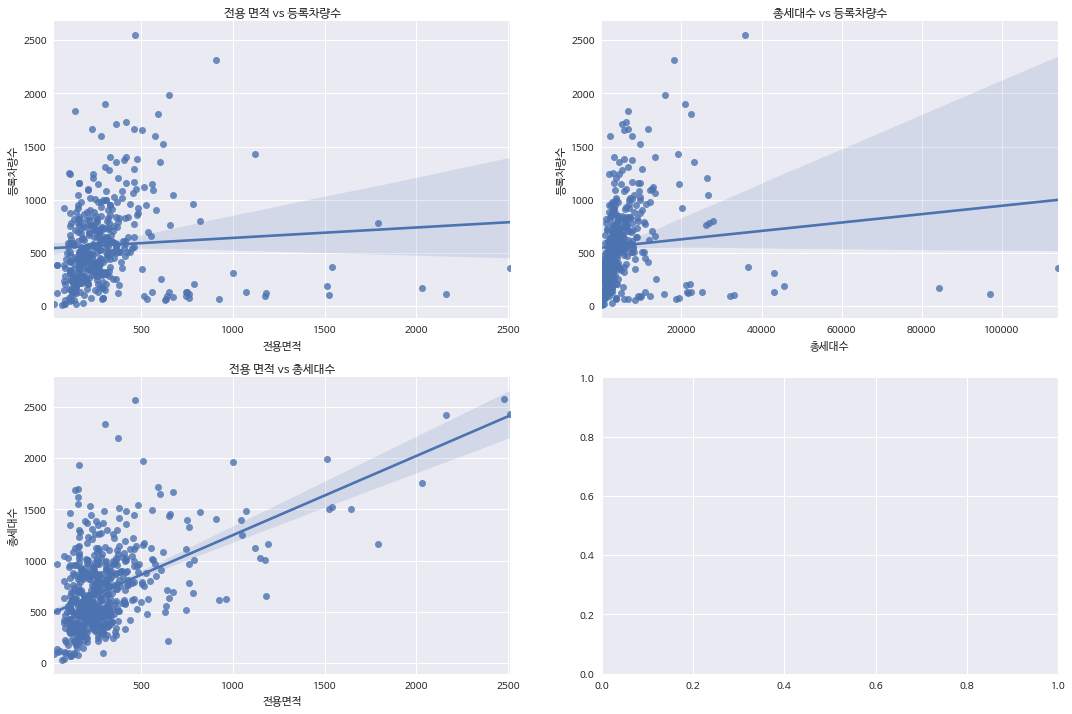

In [ ]:
# 총 세대수, 전용면적 비교
fig, ax = plt.subplots(2, 2, figsize =(18, 12))
sns.regplot(train.groupby('단지코드')['전용면적'].sum(), train.groupby('단지코드')['등록차량수'].mean(), ax = ax[0][0])
ax[0][0].set_title('전용 면적 vs 등록차량수')
sns.regplot(train.groupby('단지코드')['총세대수'].sum(), train.groupby('단지코드')['등록차량수'].mean(), ax = ax[0][1])
ax[0][1].set_title('총세대수 vs 등록차량수')
sns.regplot(dt.groupby('단지코드')['전용면적'].sum(), dt.groupby('단지코드')['총세대수'].mean(), ax = ax[1][0])
ax[1][0].set_title('전용 면적 vs 총세대수')
plt.show()

> 전용면적과 총세대수는 서로 관련이 커보이며, 전용면적과 총세대수 모두 세대수나 전용면적에 비해 엄청나게 작은 비율의 등록챠량수를 보유한 몇군데를 제외하면 등록차량수와 비례관계를 보여준다. 

6. 비정상적으로 낮은 비율의 등록차량수를 보이는곳을 이상치로 처리가 가능한가?

In [ ]:
# 전용면적별 등록차량수
out = pd.concat([train.groupby('단지코드')['전용면적'].sum(), train.groupby('단지코드')['등록차량수'].mean()], axis = 1)
out['percentage'] = out['등록차량수'] / out['전용면적'] 
out.head()

,전용면적,등록차량수,percentage
단지코드,,,
C1000,316.53,481.0,1.519603
C1004,743.60,93.0,0.125067
C1005,163.08,376.0,2.305617
C1013,230.71,1665.0,7.216852
C1014,344.63,708.0,2.054377


In [ ]:
# 30% 미만인 단지 확인
outlier_cols = list(out.loc[out.percentage < 0.3].index.values)

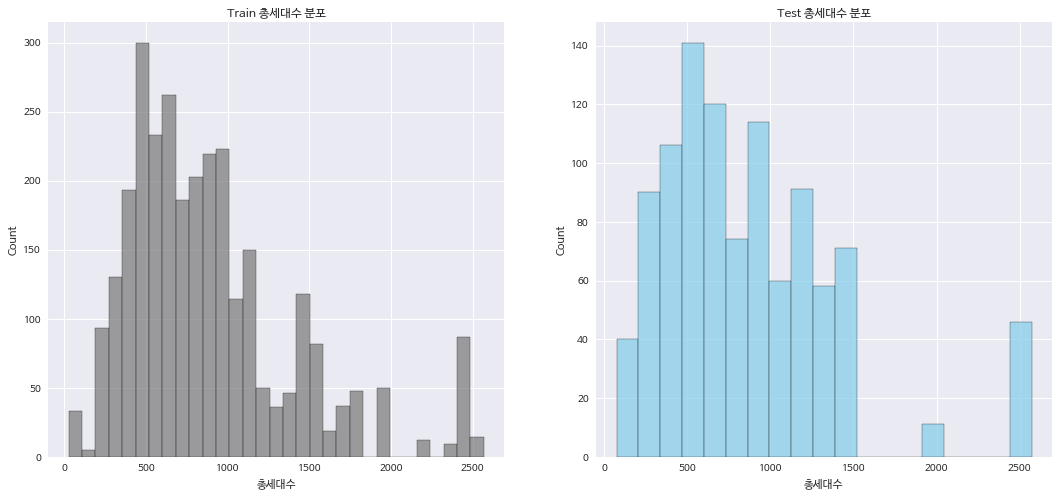

In [ ]:
# 먼저 Train/test의 분포를 확인 총세대수 1500 2500 사이를 제외하면 거의 유사함
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(train['총세대수'], ax = ax[0], color = 'gray')
ax[0].set_title('Train 총세대수 분포')
sns.histplot(test['총세대수'], ax = ax[1], color = 'skyblue')
ax[1].set_title('Test 총세대수 분포')
plt.show()

> 대게 비슷한 분포를 보여준다, 세대수가 1500 이상인(2000 또는 2500)의 경우를 좀 더 자세히 보자.

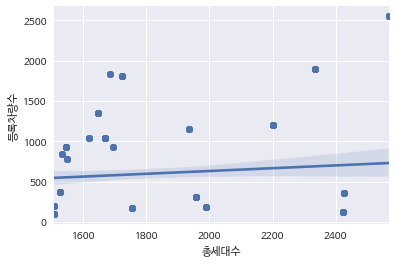

In [ ]:
# 총세대수가 1500보다 큰 경우
sns.regplot(train.loc[train.총세대수 > 1500, '총세대수'], train.loc[train.총세대수 > 1500, '등록차량수'])

In [ ]:
# 총세대수가 1500 보다 큰 경우
dt_1500 = dt.loc[dt.총세대수 > 1500, :]
dt_1500 = dt_1500.loc[dt_1500.단지코드.isin(outlier_cols), :]

> 왜 이렇게 낮은걸까?

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      3974 non-null   object 
 1   총세대수      3974 non-null   int64  
 2   임대건물구분    3974 non-null   object 
 3   지역        3974 non-null   object 
 4   공급유형      3974 non-null   object 
 5   전용면적      3974 non-null   float64
 6   전용면적별세대수  3974 non-null   int64  
 7   공가수       3974 non-null   float64
 8   신분        3974 non-null   object 
 9   임대보증금     3225 non-null   object 
 10  임대료       3225 non-null   object 
 11  지하철       3721 non-null   float64
 12  버스        3970 non-null   float64
 13  단지내주차면수   3974 non-null   float64
 14  is_train  3974 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 576.8+ KB


In [ ]:
# 숫자형 특성
num_features = dt.select_dtypes(exclude=['object']).columns.to_list()
num_features

['총세대수',
 '전용면적',
 '전용면적별세대수',
 '공가수',
 '임대보증금',
 '임대료',
 '지하철',
 '버스',
 '단지내주차면수',
 'is_train']

In [ ]:
# 범주형 데이터 특성
cat_features = dt.select_dtypes(include=['object']).columns.to_list()
cat_features

['단지코드', '임대건물구분', '지역', '공급유형', '신분']

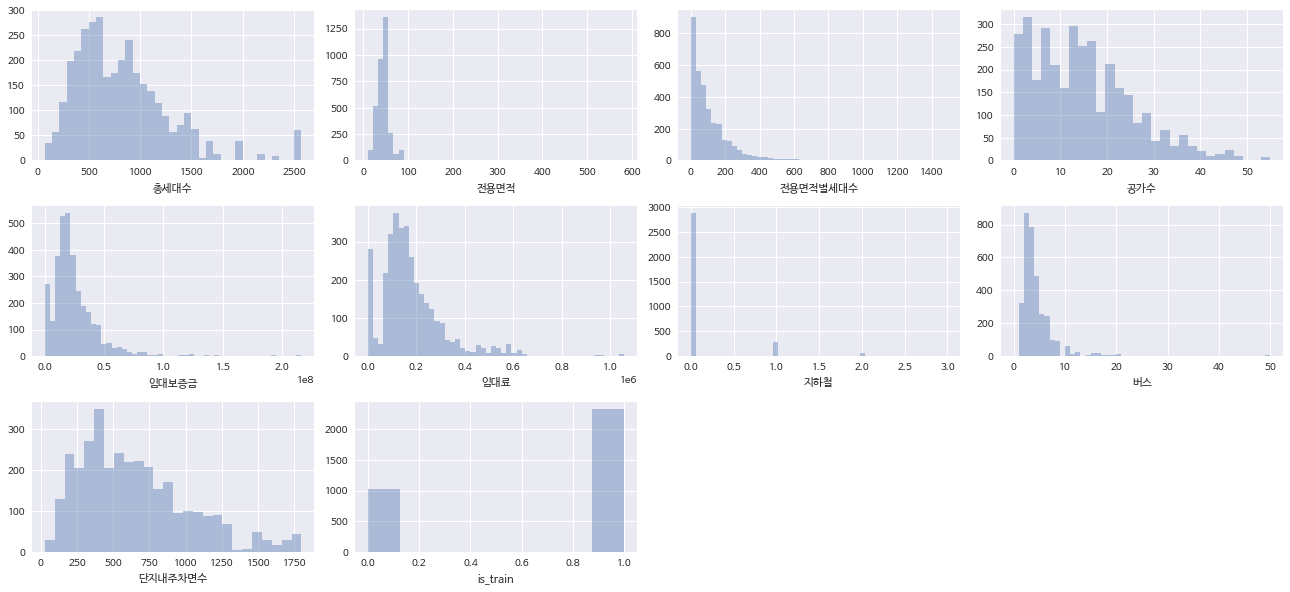

In [ ]:
# 총세대수 1500이하 숫자형 데이터 분포확인
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_features):
    plt.subplot(6,4,index+1)
    sns.distplot(dt.loc[~dt.단지코드.isin(outlier_cols),col], kde=False)
fig.tight_layout(pad=1.0)

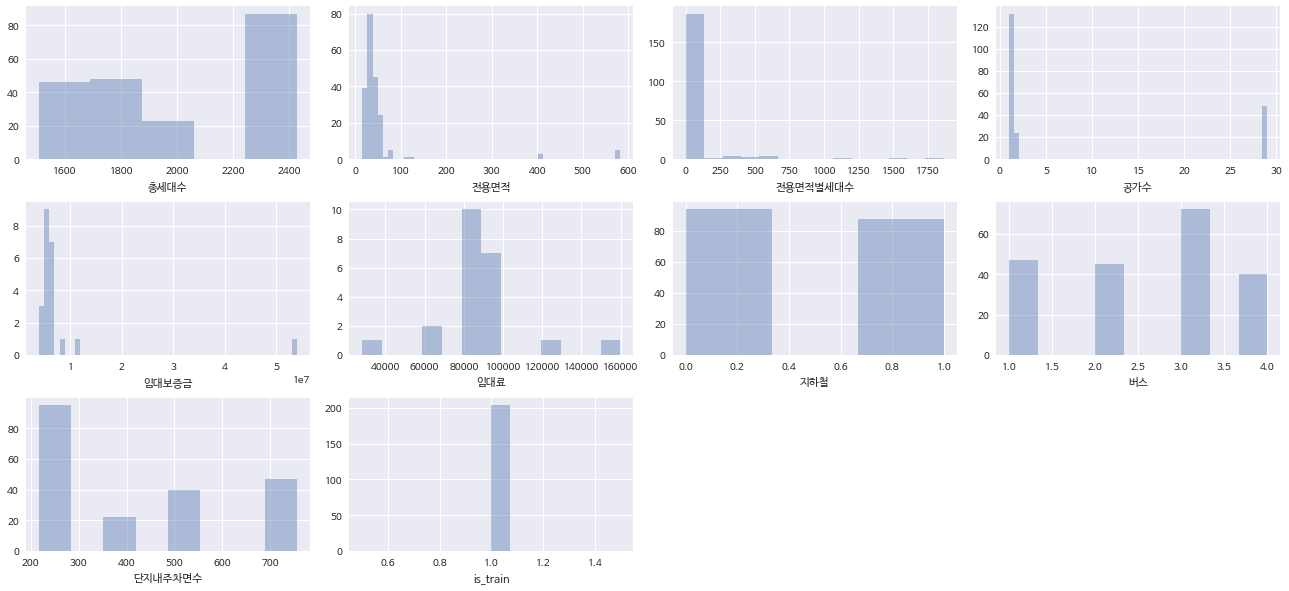

In [ ]:
# 총세대수가 1500 보다 큰 경우
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num_features):
    plt.subplot(6,4,index+1)
    sns.distplot(dt_1500.loc[:,col], kde=False)
fig.tight_layout(pad=1.0)

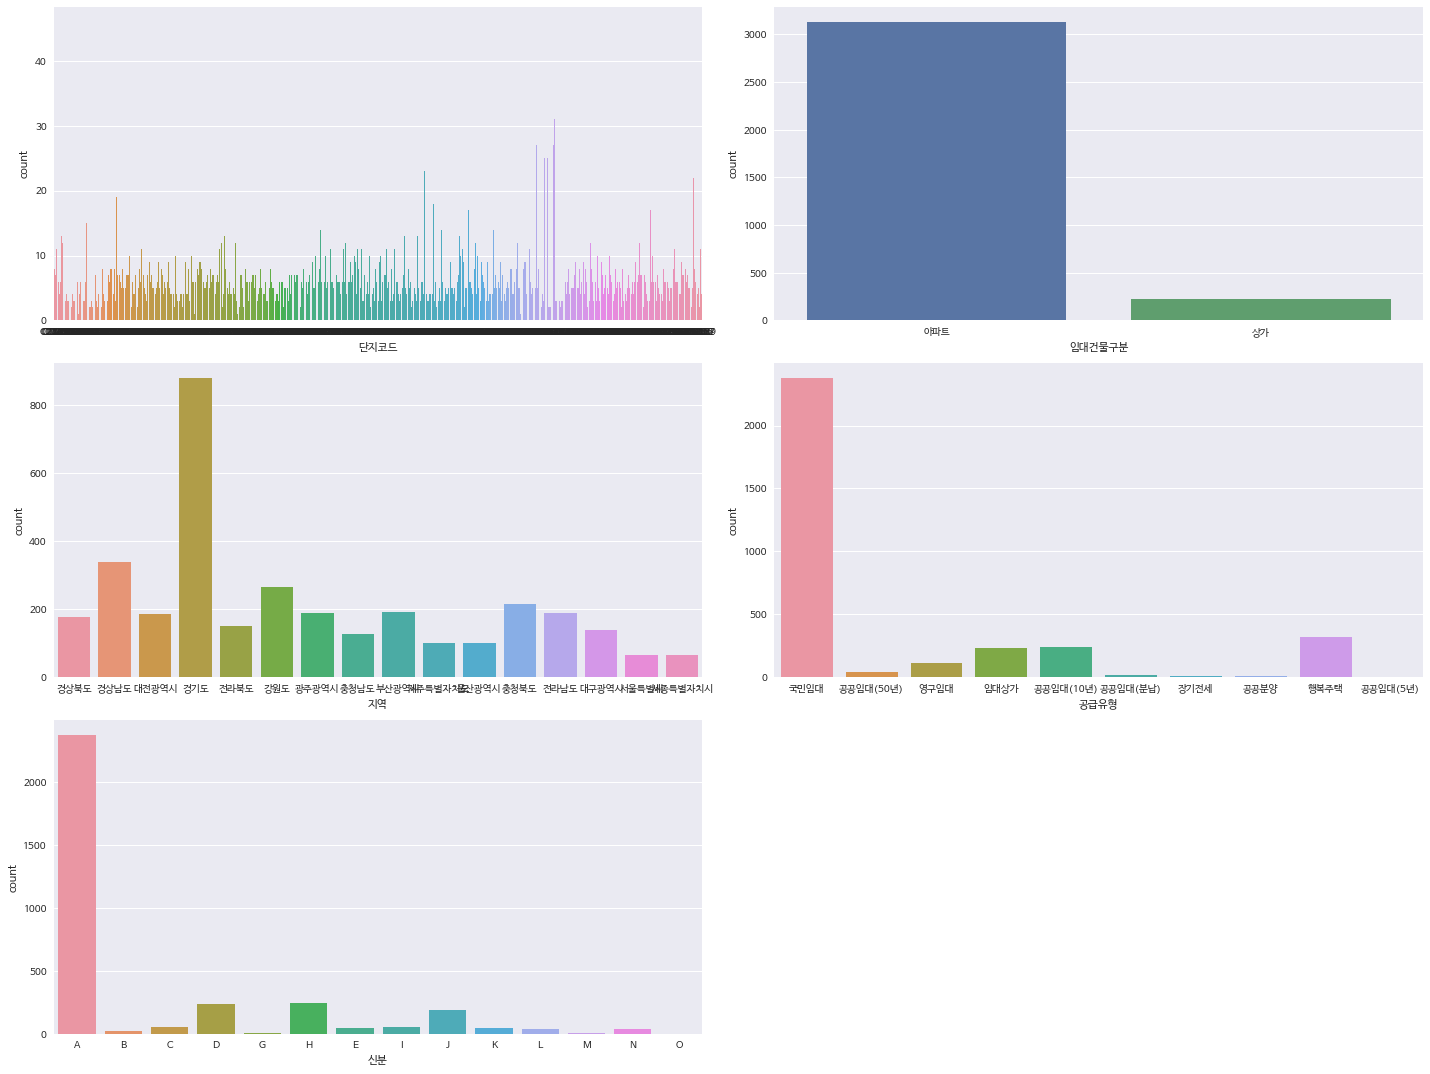

In [ ]:
# 범주형 데이터 총세대수 1500이하
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(cat_features):
    plt.subplot(3,2,index+1)
    sns.countplot(x=col, data=dt.loc[~dt.단지코드.isin(outlier_cols),:])
fig.tight_layout(pad=1.0)

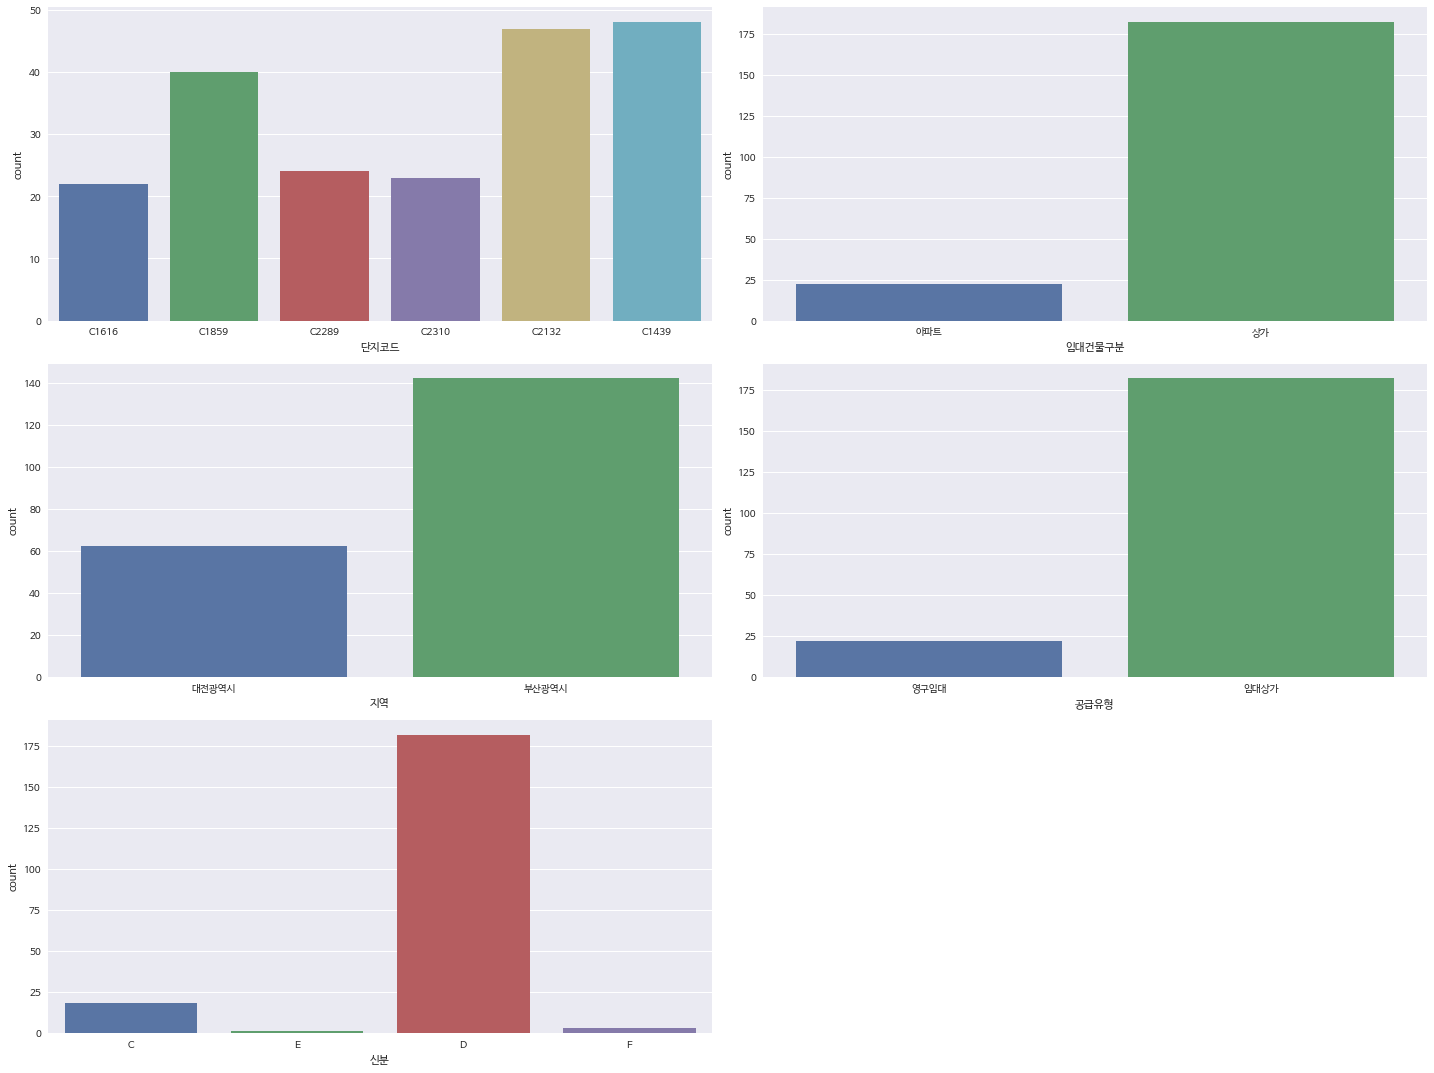

In [ ]:
# 범주형 데이터 총세대수 1500이상
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(cat_features):
    plt.subplot(3,2,index+1)
    sns.countplot(x=col, data=dt_1500)
fig.tight_layout(pad=1.0)

In [ ]:
# 총세대수 1500 보다 큰 경우 상가비율 평균
pd.crosstab(dt_1500.단지코드, dt_1500.임대건물구분, margins = True).style.background_gradient('summer_r')

임대건물구분,상가,아파트,All
단지코드,,,
C1439,45,3,48
C1616,19,3,22
C1859,35,5,40
C2132,43,4,47
C2289,20,4,24
C2310,20,3,23
All,182,22,204


In [ ]:
print('상가비율 : ', 182/204, '%')

상가비율 :  0.8921568627450981 %


> 총세대수가 1500 이상인경우 상가의 비율이 압도적으로 높다. 그리고 부산과 대전광역시의 지역에서만 확인할 수 있다. 상가비율도 중요해보인다. 



In [ ]:
# 단지코드별 상가비율 계산
store_percetage_by_code = pd.crosstab(dt.단지코드, dt.임대건물구분)
store_percetage_by_code['상가비율'] = store_percetage_by_code['상가'] / (store_percetage_by_code['상가']+store_percetage_by_code['아파트'])

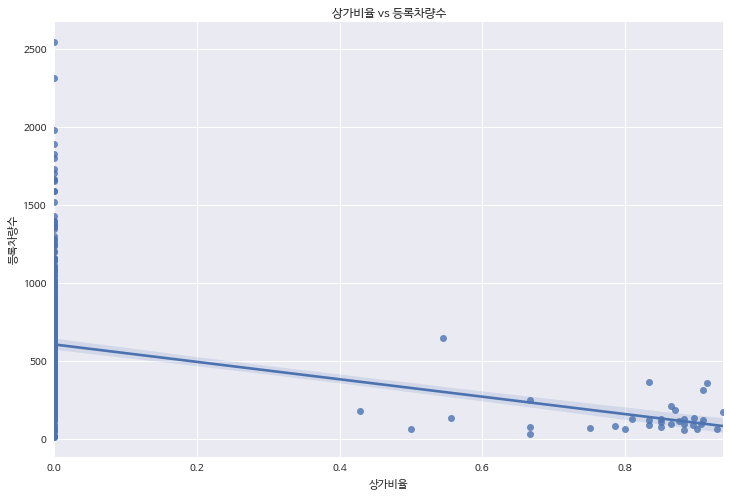

In [ ]:
#전용면적
plt.subplots(figsize=(12,8))
sns.regplot(store_percetage_by_code.loc[store_percetage_by_code.index.isin(train.단지코드.unique()), '상가비율'], train.groupby('단지코드')['등록차량수'].mean())
plt.title('상가비율 vs 등록차량수')
plt.show()

In [ ]:
# 상가비율 특성 추가
train_agg = pd.merge(train_agg, store_percetage_by_code[['상가비율']], on = '단지코드')
test_agg = pd.merge(test_agg, store_percetage_by_code[['상가비율']], on = '단지코드')

In [ ]:
train_agg.head()

,단지코드,총세대수,지역,공가수,지하철,버스,단지내주차면수,공급유형,상가비율
0,C2483,900,경상북도,38.0,0.0,3.0,1425.0,국민임대,0.0
1,C2515,545,경상남도,17.0,0.0,3.0,624.0,국민임대,0.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,국민임대,0.0
3,C1945,755,경기도,6.0,1.0,3.0,734.0,국민임대,0.0
4,C1470,696,전라북도,14.0,0.0,2.0,645.0,국민임대,0.0


In [ ]:
test_agg.head()

,단지코드,총세대수,지역,공가수,지하철,버스,단지내주차면수,공급유형,상가비율
0,C1072,754,경기도,14.0,0.0,2.0,683.0,국민임대,0.0
1,C1128,1354,경기도,9.0,0.0,3.0,1216.0,국민임대,0.0
2,C1456,619,부산광역시,18.0,0.0,16.0,547.0,국민임대,0.0
3,C1840,593,전라북도,7.0,0.0,3.0,543.0,국민임대,0.0
4,C1332,1297,경기도,11.0,0.0,2.0,1112.0,국민임대,0.0


# Null 처리


In [ ]:
# Train/Test 총 결측치 확인
dt.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금         0
임대료           0
지하철         253
버스            4
단지내주차면수       0
is_train      0
dtype: int64

In [ ]:
# 지하철 결측치 처리
dt.loc[((dt.지하철.isnull())), '지역'].value_counts()

충청남도     147
대전광역시    102
경상남도       4
Name: 지역, dtype: int64

In [ ]:
# 경상남도 결측치 처리
dt.loc[((dt.지하철.isnull()) & (dt.지역 == '경상남도')), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,is_train
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1


In [ ]:
dt.loc[dt.지역 == '경상남도', '지하철'].value_counts()

0.0    446
1.0      4
Name: 지하철, dtype: int64

In [ ]:
# 모두 0으로 대치하자
dt.loc[((dt.지하철.isnull()) & (dt.지역 == '경상남도')), '지하철'] = 0
dt.loc[((dt.버스.isnull()) & (dt.지역 == '경상남도')), '버스'] = 0

In [ ]:
# 충청남도 지역 결측치
dt.loc[dt.지역 == '충청남도', '지하철'].value_counts()

0.0    52
Name: 지하철, dtype: int64

In [ ]:
dt.loc[((dt.지하철.isnull()) & (dt.지역 == '충청남도')), '지하철'] = 0

In [ ]:
# 대전 광역시 결측치
dt.loc[((dt.지하철.isnull()) & (dt.지역 == '대전광역시')), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,is_train
144,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,A,14247000,198980,NaN,7.0,517.0,1
145,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,A,20173000,225100,NaN,7.0,517.0,1
146,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,A,21203000,225100,NaN,7.0,517.0,1
147,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,A,22307000,89210,NaN,5.0,736.0,1
148,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,A,22307000,89210,NaN,5.0,736.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,C1083,427,아파트,대전광역시,국민임대,59.45,120,0.0,A,39950000,243430,NaN,6.0,384.0,0
891,C1327,98,아파트,대전광역시,행복주택,16.83,30,13.0,J,18800000,94000,NaN,17.0,98.0,0
892,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,J,28400000,142000,NaN,17.0,98.0,0
893,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,J,28400000,142000,NaN,17.0,98.0,0


In [ ]:
# 지역별 버스 지하철 수 확인
pd.crosstab(dt.지역, [dt.버스, dt.지하철]).style.background_gradient('summer_r')

In [ ]:
dt.loc[((dt.지하철.isnull()) & (dt.지역 == '대전광역시')), '지하철'] = 0

In [ ]:
dt.isnull().any()

단지코드        False
총세대수        False
임대건물구분      False
지역          False
공급유형        False
전용면적        False
전용면적별세대수    False
공가수         False
신분          False
임대보증금       False
임대료         False
지하철         False
버스          False
단지내주차면수     False
is_train    False
dtype: bool

In [ ]:
# 임대보증금과 임대료는 '-'을 null로 바꿈
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

# 임대보증금과 임대료가 NULL인 경우는 0으로 대치
train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

train_agg.loc[train_agg.지하철.isnull(), '지하철'] = 0
train_agg.loc[train_agg.버스.isnull(), '버스'] = 0

test_agg.loc[test_agg.지하철.isnull(), '지하철'] = 0
test_agg.loc[test_agg.버스.isnull(), '버스'] = 0

# 정리
1. 하나의 단지코드에 서로다른 아파트와 상가로 구성되어 있어 단지코드의 중복값이 존재한다.
2. 총세대수는 전용면적별 세대수의 총합과 같다. 
3. 임대건물구분은 아파트 상가 2가지로 나뉘는데 단지내에 상가가 있냐 없냐의 여부는 중요한 특성일 수 있다.
4. 상가의 공급유형은 모두 임대상가이다. 
5. 아파트의 공급유형은 신분을 기준으로 아래와 같이 나눌 수 있다. 
  - 장기전세 + 공공임대 
  - 국민임대 
  - 공공분양 + 임대상가 
  - 행복주택
  - 영구임대 
6. 총세대수에 비해 비교적 낮은 등록차량수를 보여주는곳은 상가의 비율이 약 80%인 경우이다. 


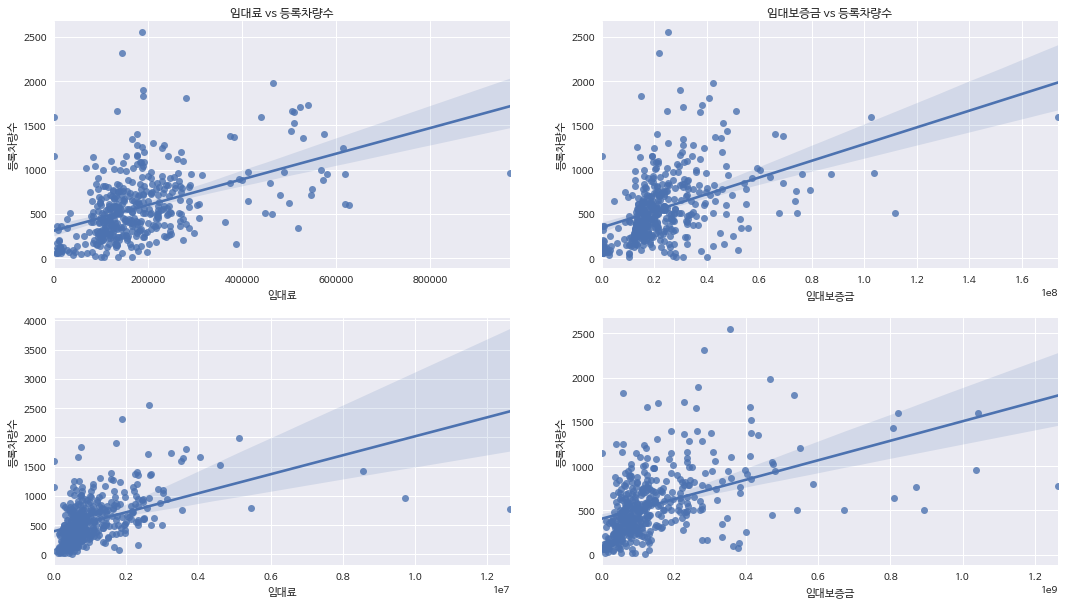

In [ ]:
# 임대보증금, 임대료 확인
fig, ax = plt.subplots(2, 2, figsize=(18,10))
sns.regplot(train.groupby('단지코드')['임대료'].mean(), train.groupby('단지코드')['등록차량수'].mean(), ax = ax[0][0])
ax[0][0].set_title('임대료 vs 등록차량수')
sns.regplot(train.groupby('단지코드')['임대보증금'].mean(), train.groupby('단지코드')['등록차량수'].mean(), ax = ax[0][1])
ax[0][1].set_title('임대보증금 vs 등록차량수')
sns.regplot(train.groupby('단지코드')['임대료'].sum(), train.groupby('단지코드')['등록차량수'].mean(), ax = ax[1][0])
sns.regplot(train.groupby('단지코드')['임대보증금'].sum(), train.groupby('단지코드')['등록차량수'].mean(), ax = ax[1][1])
plt.show()

In [ ]:
# 전용면적 추가 
train_agg = pd.merge(train_agg, train.groupby('단지코드')['전용면적'].mean(), on='단지코드')
test_agg = pd.merge(test_agg, test.groupby('단지코드')['전용면적'].mean(), on='단지코드')

> 결측치가 존재하지 않기 때문에, 평균을 사용.

In [ ]:
train_agg = pd.merge(train_agg, train.groupby('단지코드')['임대보증금'].sum(), on='단지코드')
test_agg = pd.merge(test_agg, test.groupby('단지코드')['임대보증금'].sum(), on='단지코드')

In [ ]:
train_agg = pd.merge(train_agg, train.groupby('단지코드')['임대료'].sum(), on='단지코드')
test_agg = pd.merge(test_agg, test.groupby('단지코드')['임대료'].sum(), on='단지코드')
train_agg

,단지코드,총세대수,지역,공가수,지하철,버스,단지내주차면수,공급유형,상가비율,등록차량수,전용면적,임대보증금,임대료
0,C2483,900,경상북도,38.0,0.0,3.0,1425.0,국민임대,0.0,1015.0,49.876250,198211000.0,1343280.0
1,C2515,545,경상남도,17.0,0.0,3.0,624.0,국민임대,0.0,205.0,44.345714,117510000.0,976900.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,국민임대,0.0,1064.0,41.253636,313616000.0,1944030.0
3,C1945,755,경기도,6.0,1.0,3.0,734.0,국민임대,0.0,730.0,50.510000,135910000.0,1134640.0
4,C1470,696,전라북도,14.0,0.0,2.0,645.0,국민임대,0.0,553.0,42.982500,70891000.0,480600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,행복주택,0.0,57.0,26.616000,130800000.0,555900.0
419,C2035,492,강원도,24.0,0.0,1.0,521.0,국민임대,0.0,246.0,36.150000,78650000.0,794000.0
420,C2020,40,부산광역시,7.0,1.0,2.0,25.0,행복주택,0.0,19.0,26.616667,84400000.0,407930.0
421,C2437,90,충청북도,12.0,0.0,1.0,30.0,영구임대,0.0,16.0,24.830000,10346000.0,107530.0


> 임대료, 임대보증금은 0으로 대치한 값들이 많기 때문에 평균보다는 합으로 그룹화

In [ ]:
train_agg = train_agg.set_index('단지코드')
test_agg = test_agg.set_index('단지코드')

train_agg.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,공급유형,상가비율,등록차량수,전용면적,임대보증금,임대료
단지코드,,,,,,,,,,,,
C2483,900,경상북도,38.0,0.0,3.0,1425.0,국민임대,0.0,1015.0,49.876250,198211000.0,1343280.0
C2515,545,경상남도,17.0,0.0,3.0,624.0,국민임대,0.0,205.0,44.345714,117510000.0,976900.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,국민임대,0.0,1064.0,41.253636,313616000.0,1944030.0
C1945,755,경기도,6.0,1.0,3.0,734.0,국민임대,0.0,730.0,50.510000,135910000.0,1134640.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,국민임대,0.0,553.0,42.982500,70891000.0,480600.0


In [ ]:
test_agg.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,공급유형,상가비율,전용면적,임대보증금,임대료
단지코드,,,,,,,,,,,
C1072,754,경기도,14.0,0.0,2.0,683.0,국민임대,0.0,48.436250,304962000.0,2126750.0
C1128,1354,경기도,9.0,0.0,3.0,1216.0,국민임대,0.0,46.178889,307125000.0,2209650.0
C1456,619,부산광역시,18.0,0.0,16.0,547.0,국민임대,0.0,45.007778,305687000.0,2012620.0
C1840,593,전라북도,7.0,0.0,3.0,543.0,국민임대,0.0,44.492500,75697000.0,492600.0
C1332,1297,경기도,11.0,0.0,2.0,1112.0,국민임대,0.0,46.453750,330676000.0,2343040.0


In [ ]:
train_agg = pd.merge(train_agg, train.groupby('단지코드')['등록차량수'].mean(), on = '단지코드')

In [ ]:
train_agg.drop('상가여부', axis = 1, inplace = True)
test_agg.drop('상가여부', axis = 1, inplace = True)

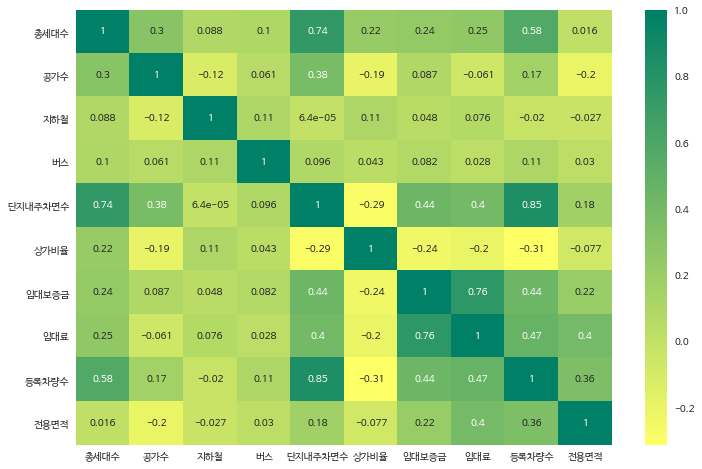

In [ ]:
# 상관계수 확인
plt.subplots(figsize = (12,8))
sns.heatmap(train_agg.corr(), cmap = 'summer_r', annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 범주형 데이터 특성 인코딩
cat_features = train_agg.select_dtypes(include=['object']).columns.to_list()
target_feature = '등록차량수'

train_encoded = train_agg.copy()
test_encoded = test_agg.copy()

enc = LabelEncoder()
for col in cat_features:
  train_encoded[col] = enc.fit_transform(train_encoded[col])
  test_encoded[col] = enc.transform(test_encoded[col])

train_encoded.head()

,총세대수,지역,공가수,지하철,버스,단지내주차면수,공급유형,상가비율,등록차량수,전용면적,임대보증금,임대료
단지코드,,,,,,,,,,,,
C2483,900,3,38.0,0.0,3.0,1425.0,4,0.0,1015.0,49.876250,198211000.0,1343280.0
C2515,545,2,17.0,0.0,3.0,624.0,4,0.0,205.0,44.345714,117510000.0,976900.0
C1407,1216,6,13.0,1.0,1.0,1285.0,4,0.0,1064.0,41.253636,313616000.0,1944030.0
C1945,755,1,6.0,1.0,3.0,734.0,4,0.0,730.0,50.510000,135910000.0,1134640.0
C1470,696,12,14.0,0.0,2.0,645.0,4,0.0,553.0,42.982500,70891000.0,480600.0


# 모델링

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# feature 
cat_features = train_agg.select_dtypes(include=['object']).columns.to_list()
target_feature = '등록차량수'

In [ ]:
#Validation function
n_folds = 5
X_train = train_encoded.drop(columns=[target_feature])
y_train = train_encoded[target_feature]
                       
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    mae= -cross_val_score(model, X_train.values, np.log(y_train), scoring="neg_mean_absolute_error", cv = kf)
    return(mae)

In [ ]:
# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
# Enet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
# KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
# GBoost
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
# XGB
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
# LGB
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, 
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 85kB/s 


In [ ]:
from catboost import CatBoostRegressor

# Catboost
catb = CatBoostRegressor(
         cat_features=cat_features,
         loss_function='MAE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42
    )
    
catb.fit(train_agg.drop(columns=[target_feature]), train_agg[target_feature], verbose=100)

0:	learn: 280.1926703	total: 2.87ms	remaining: 1.43s
100:	learn: 93.9743244	total: 231ms	remaining: 912ms
200:	learn: 69.3010109	total: 449ms	remaining: 668ms
300:	learn: 55.2247302	total: 675ms	remaining: 447ms
400:	learn: 46.4454884	total: 897ms	remaining: 222ms
499:	learn: 40.6176347	total: 1.13s	remaining: 0us


In [ ]:
score = mae_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.4183 (0.2224)



In [ ]:
score = mae_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 159.1419 (61.2690)



In [ ]:
score = mae_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 239.0248 (70.6339)



In [ ]:
score = mae_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 161.5156 (44.0741)



In [ ]:
score = mae_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 176.4712 (55.8478)



In [ ]:
score = mae_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 164.1201 (42.2686)



In [ ]:
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_agg.drop(columns=[target_feature]))
mae= -cross_val_score(catb, train_agg.drop(columns=[target_feature]), train_agg[target_feature], scoring="neg_mean_absolute_error", cv = kf)
print("CatB score: {:.4f} ({:.4f})\n" .format(mae.mean(), mae.std()))

0:	learn: 274.6183421	total: 2.62ms	remaining: 1.3s
1:	learn: 264.3610562	total: 5.4ms	remaining: 1.34s
2:	learn: 255.8694783	total: 7.68ms	remaining: 1.27s
3:	learn: 246.9386188	total: 10ms	remaining: 1.24s
4:	learn: 239.1793383	total: 12.3ms	remaining: 1.22s
5:	learn: 231.2959175	total: 14.7ms	remaining: 1.21s
6:	learn: 223.8888637	total: 16.4ms	remaining: 1.16s
7:	learn: 217.9258413	total: 18.7ms	remaining: 1.15s
8:	learn: 212.4901120	total: 21.1ms	remaining: 1.15s
9:	learn: 207.3273439	total: 23.6ms	remaining: 1.16s
10:	learn: 201.5168069	total: 25.9ms	remaining: 1.15s
11:	learn: 196.0469721	total: 28.2ms	remaining: 1.14s
12:	learn: 192.0627348	total: 29.8ms	remaining: 1.12s
13:	learn: 187.9447255	total: 32.3ms	remaining: 1.12s
14:	learn: 183.4960903	total: 34.6ms	remaining: 1.12s
15:	learn: 178.3914439	total: 36.9ms	remaining: 1.12s
16:	learn: 172.9907496	total: 39.5ms	remaining: 1.12s
17:	learn: 168.7380185	total: 42ms	remaining: 1.12s
18:	learn: 165.6336567	total: 44.2ms	remaini

In [ ]:
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard 활용

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = mae_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 152.4633 (30.2712)



In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = mae_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 156.3694 (57.3278)


In [ ]:
stacked_averaged_models.fit(X_train.values, y_train)
sample_submission['num'] = stacked_averaged_models.predict(test_encoded.values)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


In [ ]:
from sklearn.model_selection import cross_val_predict
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

averaged_models.fit(X_train, y_train)
sample_submission['num'] = averaged_models.predict(test_encoded)

In [ ]:
sample_submission.to_csv('test2.csv', index=False)

In [ ]:
!pip install dacon_submit_api-0.0.4-py3-none-any.whl

Processing ./dacon_submit_api-0.0.4-py3-none-any.whl


In [ ]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
'test2.csv', 
'f032339f73cb09b743bc9bcb44b21b119ba8d1f7b513a6c37803bde98ebb6570', 
'235745', 
'JaywooLEE', 
'test2' )

{'isSubmitted': True, 'detail': 'Success'}


In [ ]:
CV = ['154.9645 (49.2098)', '152.4633 (30.2712)', '156.3694 (57.3278)']
LB = ['116.7773', '111.53491', '111.0887246552']